Compares cluster analyses done with different tracer combinations

In [3]:
# load data from database for tracer combination
# produce model output

In [2]:
from chem_ocean import ocean_data as oc_data
from chem_ocean.ocean_plt_util import make_section, subplot_labels
from chem_ocean import ocean_plt as oc_plt
from chem_ocean import ocean_analysis as oc_an

from chem_ocean import Build_Map as bm

from collections import Counter
import matplotlib.pyplot as plt

[('mini_batch_kmeans', MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0))]
0.06343984603881836


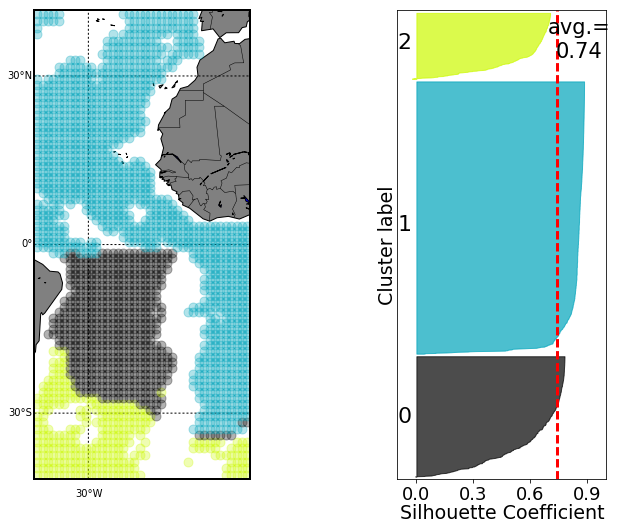

In [3]:
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_plan([-40,40], [-40,0], ['salinity', 'temperature'], 4000)
#_x, _y, _feat_data, _basemap, _xLab, _yLab, _latLon_params = get_section('EW_section', -40, [-40,0], ['nitrate'])
# _x, _y, _feat_data, _basemap, _xLab, _yLab, _latLon_params = get_section('NS_section', -30, [-40,0], ['salinity', 'temperature'])

models_st = oc_an.test_clustering4(_x, _y, _feat_data, _xLab, _yLab, 3, _latLon_params, _basemap, ['mini_batch_kmeans'])
pred_dict, fig = oc_plt.plot_model_output(_x, _y, _xLab, _yLab, -40, 40, -40, 0, _latLon_params, models_st['mini_batch_kmeans'], 'mini_batch_kmeans', 'plan', sil = "yes")

[('mini_batch_kmeans', MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0))]
0.14867091178894043


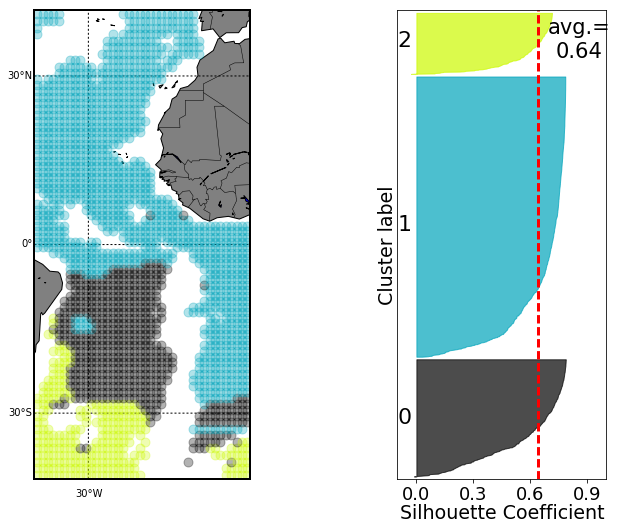

In [4]:
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_plan([-40,40], [-40,0], ['phostphate','nitrate'], 4000)
#_x, _y, _feat_data, _basemap, _xLab, _yLab, _latLon_params = get_section('EW_section', -40, [-40,0], ['nitrate'])
# _x, _y, _feat_data, _basemap, _xLab, _yLab, _latLon_params = get_section('NS_section', -30, [-40,0], ['phostphate','nitrate'])

models_np = oc_an.test_clustering4(_x, _y, _feat_data, _xLab, _yLab, 3, _latLon_params, _basemap, ['mini_batch_kmeans'])
pred_dict, fig = oc_plt.plot_model_output(_x, _y, _xLab, _yLab, -40, 40, -40, 0, _latLon_params, models_np['mini_batch_kmeans'], 'mini_batch_kmeans', 'plan', sil = "yes")

In [4]:
y_pred1 = list(models_np['mini_batch_kmeans']['y_pred'])
y_pred2 = list(models_st['mini_batch_kmeans']['y_pred'])

In [7]:
color1 = y_pred1[0]
color2 = y_pred2[0]
ctr = 0
mapping = {}
for ik in range(len(y_pred1)):
    if y_pred1[ik]== color1 and y_pred2[ik]== color2:
        ctr += 1
        if ctr == 50 and color1 not in mapping and color2 not in mapping.values():
            mapping[color1]=color2
            ctr = 0
            print(mapping)
    else:
        color1 = y_pred1[ik]
        color2 = y_pred2[ik]
        ctr = 0

        
        
remaining = []
c1 = Counter(y_pred1)
for ik in range(len(c1)):
    if ik not in mapping:
        remaining.append(ik)
        
ctr = 0
print(remaining)
for remainder in remaining:
    color1 = remainder
    for ik in range(100,len(y_pred1)):
        c = Counter(y_pred1[ik-100:ik])
        if color1 in c and c[color1]/100 >.6 and y_pred2[ik] not in mapping.values():
            mapping[color1]=y_pred2[ik]
        
    
N_CLUSTERS = len(c1)
for ik in range(N_CLUSTERS):
    if ik not in mapping:
        for ij in range(N_CLUSTERS):
            if ij not in mapping.values():
                mapping[ik]=ij
                
mapping

{2: 2}
{2: 2, 1: 1}
[0]


{0: 0, 1: 1, 2: 2}

In [8]:
for ik in range(len(y_pred1)):
    y_pred1[ik] = mapping[y_pred1[ik]]

In [9]:
print(y_pred2[0:10])
print(y_pred1[0:10])
# models[model2]['y_pred'][1:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [10]:
error_labels = []#list(len(models[model2]['y_pred']))#np.zeros((len(models[model2]['y_pred']), 1))

for ik in range(len(y_pred2)):
#     if models[model1]['y_pred'][ik] != models[model2]['y_pred'][ik]:
    if y_pred1[ik] != y_pred2[ik]:
        error_labels.append('g')
    else:
        error_labels.append('b')

# error_labels = [int(error_labels[ik][0]) for ik in range(len(error_labels))]

0.06234025955200195


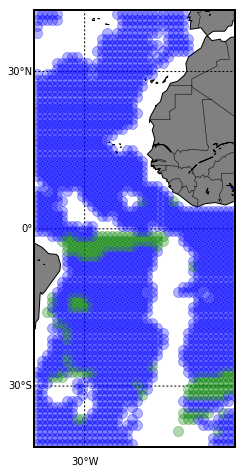

In [13]:
fig = plt.figure(figsize=(7*1, 7*1), facecolor='w')
ax = plt.subplot(100+10*1+1)
_basemap, fig, ax = bm.build_map('y', 'merc', -40, 40, -40, 0, 'c', fig, ax, 100+10*1+1, 'lb')

x,y = _basemap(_x, _y)
for im in range(len(x)):
    _basemap.plot(x[im], y[im], color = error_labels[im], marker = 'o', markersize=10, alpha = .3)  

plt.tight_layout(pad=3, w_pad=4., h_pad=3.0)